<a href="https://colab.research.google.com/github/Shruti-Shete/Twitter_Social_Network-/blob/main/SNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tweepy

In [ ]:
import pandas as pd
import numpy as np
from networkx.algorithms.bipartite.basic import color
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from networkx.algorithms import approximation as ap

In [ ]:
consumer_key = 'guh7haF7uKH9CRnxEKzy1qDiv'
consumer_secret = 'erUIeEOtoOMrR75pkbAtuHDJpErH3RSAq3MjbCpNmjmutzTwC7'
access_token = '162727883-jOF216IQFXrfGtivQI15eeaN2aiBNflcGhSItdRJ'
access_token_secret = '0z6Lnx3E8qBpLJliRjkYS8Rq8dK8QAFsaF3xwlrFkcZ9y'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

# **1. Get Data**

In [ ]:
me = api.get_user(screen_name = 'srk_cheema')
me.screen_name
target_id = me.id
me.id

162727883

In [ ]:
# the screen_name of the targeted user
screen_name = "srk_cheema"
follow_id = []
follow_username = []
follow_name = []
count = 0

# get max 150 friends
for friend in tweepy.Cursor(api.friends, screen_name).items(150):
    follow_id.append(friend.id)
    follow_username.append(friend.screen_name)
    follow_name.append(friend.name)
    count += 1

print('Total:', count)


Total: 121


In [ ]:
df = pd.DataFrame(columns=['source','target ID', 'target username', 'target name'])

df['target ID'] = follow_id
df['target username'] = follow_username
df['target name'] = follow_name

df['source'] = screen_name #Set my user ID as the source

#Create as pandas dataset
df.index = np.arange(1,len(df)+1)
df

,source,target ID,target username,target name
1,srk_cheema,38679388,gmail,Gmail
2,srk_cheema,15670515,Windows,Windows
3,srk_cheema,783214,Twitter,Twitter
4,srk_cheema,10228272,YouTube,YouTube
5,srk_cheema,494939290,Bugatti,Bugatti
...,...,...,...,...
117,srk_cheema,136932734,CMShehbaz,Shehbaz Sharif
118,srk_cheema,453507741,MaryamNSharif,Maryam Nawaz Sharif
119,srk_cheema,212162328,betterpakistan,Ahsan Iqbal
120,srk_cheema,497658491,pmln_org,PML(N)


In [ ]:
#Save dataset as csv
df.to_csv('network.csv')

# **2. Frienship Network Graph**

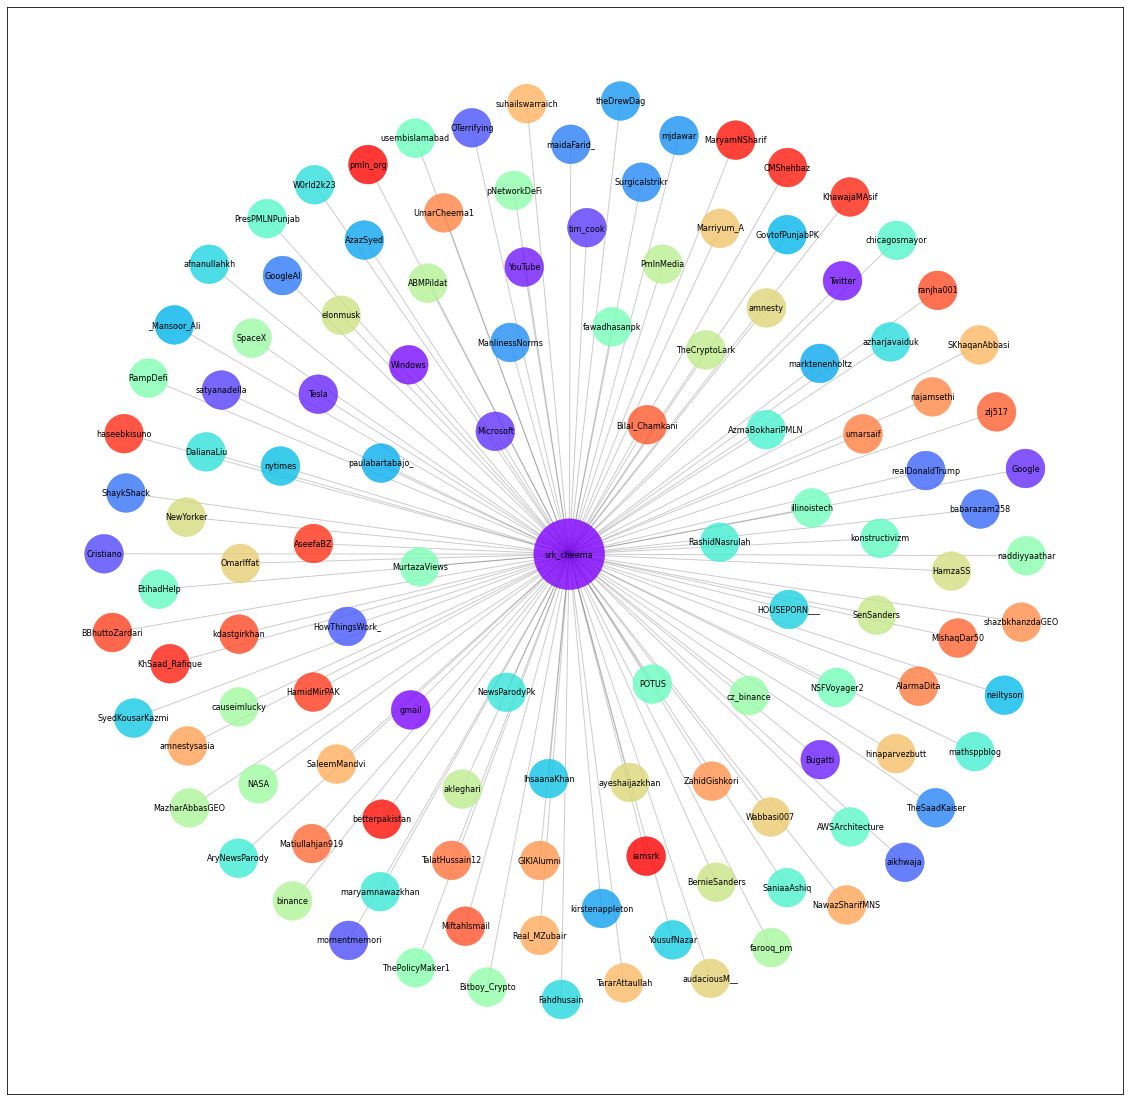

In [ ]:
import networkx as nx
G = nx.from_pandas_edgelist(df, 'source', 'target username')
pos = nx.spring_layout(G)
f, ax = plt.subplots(figsize=(20, 20))
plt.style.use('ggplot')

node_colors = cm.rainbow(np.linspace(0, 1, len(G.nodes()))) # generate a list of colors using the rainbow colormap

# Change size of the main node
node_to_modify = "srk_cheema"
node_size_dict = {node: 1500 for node in G.nodes()}
node_size_dict[node_to_modify] = 5000   #Set the size of the node to 15000

nodes = nx.draw_networkx_nodes(G, pos, node_size=list(node_size_dict.values()), alpha=0.8, node_color=node_colors)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)

# **3. Network Measures**

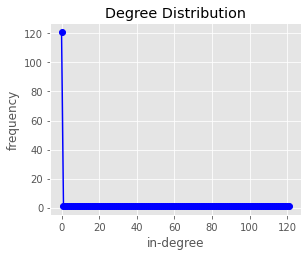

In [ ]:
#Degree Distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
dmax = max(degree_sequence)
fig = plt.figure("Degree of the graph", figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b", marker="o")
ax1.set_title("Degree Distribution")
ax1.set_ylabel("frequency")
ax1.set_xlabel("in-degree")

fig.tight_layout()
plt.show()

In [ ]:
#Clustering Coefficient
print("Clustering Coefficient:",nx.average_clustering(G))


Clustering Coefficient: 0.0


In [ ]:
#Diameter
print("Diameter:",nx.diameter(G))

Diameter: 2


In [ ]:
#Closeness
print("Closeness Centrality:",nx.closeness_centrality(G))


Closeness Centrality: {'srk_cheema': 1.0, 'gmail': 0.5020746887966805, 'Windows': 0.5020746887966805, 'Twitter': 0.5020746887966805, 'YouTube': 0.5020746887966805, 'Bugatti': 0.5020746887966805, 'Tesla': 0.5020746887966805, 'Google': 0.5020746887966805, 'Microsoft': 0.5020746887966805, 'tim_cook': 0.5020746887966805, 'satyanadella': 0.5020746887966805, 'Cristiano': 0.5020746887966805, 'momentmemori': 0.5020746887966805, 'OTerrifying': 0.5020746887966805, 'HowThingsWork_': 0.5020746887966805, 'aikhwaja': 0.5020746887966805, 'realDonaldTrump': 0.5020746887966805, 'babarazam258': 0.5020746887966805, 'ShaykShack': 0.5020746887966805, 'GoogleAI': 0.5020746887966805, 'maidaFarid_': 0.5020746887966805, 'TheSaadKaiser': 0.5020746887966805, 'Surgicalstrikr': 0.5020746887966805, 'ManlinessNorms': 0.5020746887966805, 'mjdawar': 0.5020746887966805, 'theDrewDag': 0.5020746887966805, 'kirstenappleton': 0.5020746887966805, 'AzazSyed': 0.5020746887966805, 'marktenenholtz': 0.5020746887966805, 'paulaba

In [ ]:
#Betweeness
print("Betweeness Centrality:",nx.betweenness_centrality(G))



Betweeness Centrality: {'srk_cheema': 0.9999999999999999, 'gmail': 0.0, 'Windows': 0.0, 'Twitter': 0.0, 'YouTube': 0.0, 'Bugatti': 0.0, 'Tesla': 0.0, 'Google': 0.0, 'Microsoft': 0.0, 'tim_cook': 0.0, 'satyanadella': 0.0, 'Cristiano': 0.0, 'momentmemori': 0.0, 'OTerrifying': 0.0, 'HowThingsWork_': 0.0, 'aikhwaja': 0.0, 'realDonaldTrump': 0.0, 'babarazam258': 0.0, 'ShaykShack': 0.0, 'GoogleAI': 0.0, 'maidaFarid_': 0.0, 'TheSaadKaiser': 0.0, 'Surgicalstrikr': 0.0, 'ManlinessNorms': 0.0, 'mjdawar': 0.0, 'theDrewDag': 0.0, 'kirstenappleton': 0.0, 'AzazSyed': 0.0, 'marktenenholtz': 0.0, 'paulabartabajo_': 0.0, '_Mansoor_Ali': 0.0, 'GovtofPunjabPK': 0.0, 'neiltyson': 0.0, 'nytimes': 0.0, 'IhsaanaKhan': 0.0, 'SyedKousarKazmi': 0.0, 'YousufNazar': 0.0, 'HOUSEPORN___': 0.0, 'afnanullahkh': 0.0, 'Fahdhusain': 0.0, 'azharjavaiduk': 0.0, 'W0rld2k23': 0.0, 'DalianaLiu': 0.0, 'NewsParodyPk': 0.0, 'maryamnawazkhan': 0.0, 'AryNewsParody': 0.0, 'RashidNasrulah': 0.0, 'mathsppblog': 0.0, 'AzmaBokhariPMLN

In [ ]:
#Density
print("Density:", nx.density(G))


Density: 0.01639344262295082


In [ ]:
#Metric closure
print("Metric closure:", ap.metric_closure(G))


Metric closure: Graph with 122 nodes and 7381 edges
